### 4. Create an ICE table for this reaction.  My advice is to create the table in terms of *moles* of species and an  advancement $\xi$.  What is the maximum possible value of $\xi$?

Choose basis of 1 mole O2 and 1.2 mole C2H6

|                     | $C_2H_6$             | $O_2$ | $C_2H_4O$ | $H_2O$ |
|:--------------------|---------------------:|-------------------------:|----------:|---:|
| I     |      1.2   | 1  | 0 | 0 |  
| C    |    $-\xi$     |    $-\xi$           | $+\xi$ |$+\xi$  |  
| E     |    1.2$-\xi$     |    1$-\xi$            | $\xi$ | $\xi$ |  $\xi_{max} = 1 \rightarrow$ complete conversion of $O_2$

Maximum value of $\xi$ is 1.2.

### 5. Define a conversion *X* as $\xi/\xi_\text{max}$, so $0 \le X \le 1$ Plot the partial pressures of all species vs $X$.  *Hint*: Recall the partial pressure is $P y_i$, and $y_i = N_i/N_\text{tot}$  from the ICE table.

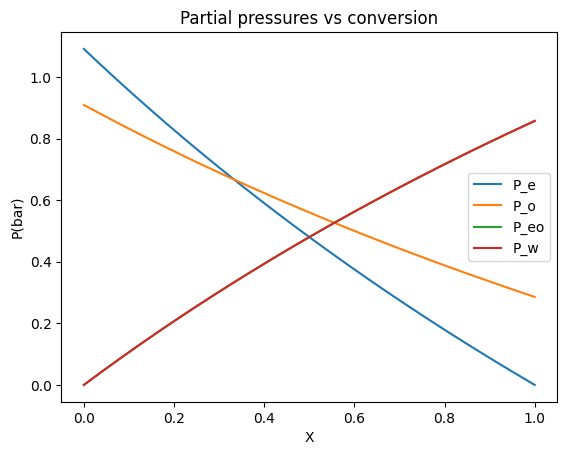

In [4]:
import numpy as np
import matplotlib.pyplot as plt

P = 2 # bar

ximax = 1.2
X = np.linspace(0,1,1000)


n_e0 = 1.2
n_o0 = 1
n_eo0 = 0
n_w0 = 0

n_e = n_e0 - X*ximax
n_o = n_o0 - (0.5)*X*ximax
n_eo = n_eo0 + X*ximax
n_w = n_w0 + X*ximax

Ntot = n_e + n_o + n_eo + n_w

y_e = n_e /Ntot
y_o = n_o /Ntot
y_eo = n_eo /Ntot
y_w = n_w / Ntot

P_e = P*y_e
P_o = P*y_o
P_eo = P*y_eo
P_w = P*y_w

plt.plot(X,P_e,label='P_e')
plt.plot(X,P_o,label='P_o')
plt.plot(X,P_eo,label='P_eo')
plt.plot(X,P_w,label='P_w')
plt.xlabel('X')
plt.ylabel('P(bar)')
plt.title('Partial pressures vs conversion')
plt.legend()
plt.show()


### 6. Plot the forward reaction rate vs $X$. Be sure to include appropriate units.

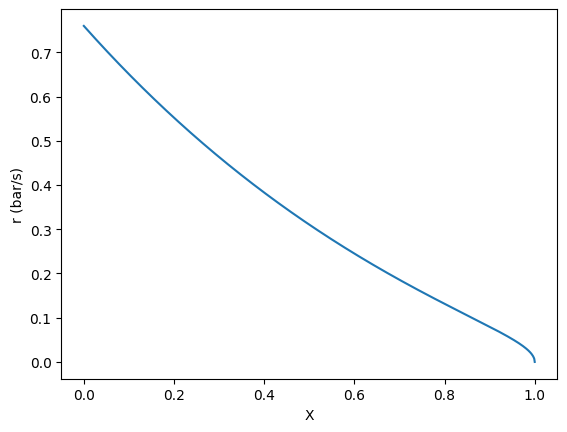

In [5]:
k = 0.8
r = k*P_e**(1/2)*P_o
plt.plot(X,r)
plt.xlabel('X')
plt.ylabel('r (bar/s)')
plt.show()

### 7. The apparent activation energy of the reaction is 60 kJ mol$^{-1}$.  What is the reaction prefactor? Include appropriate units.

In [6]:
import numpy as np
R = 8.314e-3 #kj/mol*K
Ea = 60 #kj/mol
T = 500 #K
k1 = 0.8 #bar^-0.5 * s^-1
A = k1/(np.exp(-Ea/R/T)) #bar^-0.5 * s^-1
print('Prefactor A is %.2f bar^(-0.5)*s^(-1)'%A)

Prefactor A is 1484134.21 bar^(-0.5)*s^(-1)


### 8. The apparent activation energy of the reaction is 60 kJ mol$^{-1}$.  Estimate the rate constant at 550 K.

In [7]:
k_550 = A*np.exp(-Ea/R/550)
print('rate constant at 550K is %.2f bar^(-0.5)*s^(-1)'%k_550)

rate constant at 550K is 2.97 bar^(-0.5)*s^(-1)


### 9. From the information given, can you predict the rate law for the reverse reaction?

No we can't predict the rate law. This is not an elementary step process so that we can't know the reaction order from the equation stoichiometry.

## Rate constants from scratch
### In 1996, Schneider and co-workers used quantum chemistry to compute the reaction pathway for unimolecular decomposition of trifluoromethanol, a reaction of relevance to the atmospheric degradation of hydrofluorocarbon refrigerants (*J. Phys. Chem.* **1996**, *100*, 6097- 6103, [doi:10.1021/jp952703m](https://pubs.acs.org/doi/abs/10.1021/jp952703m)):

$$\text{CF}_3\text{OH}\rightarrow \text{COF}_2 + \text{HF}$$
### Following are some of the reported results, computed at 298 K:

|                     | CF$_3$OH             | \[CF$_3$OH\]$^\ddagger$ | C(O)F$_2$ | HF |    |
|:--------------------|---------------------:|-------------------------|----------:|---:|----:|
| $E^\text{elec}$     | -412.90047           | -412.82771              | -312.57028 | -100.31885 | (Hartree) |
| ZPE                 | 0.02889              | 0.02313                 | 0.01422 | 0.00925 | (Hartree) |
| $U^\text{trans}$    | 3.7                  | 3.7   | 3.7| 3.7 | (kJ mol$^{-1}$) |
| $U^\text{rot }$     | 3.7                  | 3.7   | 3.7| 2.5 | (kJ mol$^{-1}$) |
| $U^\text{vib}$      | 4.3                  | 4.1   |1.2 | 0 |  (kJ mol$^{-1}$) |
| $q^{\text{trans}}/V$| $7.72\times 10^{32}$ | $7.72\times 10^{32}$   |$1.59\times 10^{32}$ |$8.65\times 10^{31}$ | (m$^{-3}$) |
| $q^\text{rot}$      | 61830                |  68420  | 679 | 9.59 | |
| $q^\text{vib}$      | 2.33                 |  2.28  | 1.16 | 1 | |

12. Using data from the table and harmonic transition state theory, compute the first-order rate constant for CF 3 OH decomposition at 298 K, in s −1 .

In [8]:
import numpy as np

kB=8.61734e-5 # eV/K
T1=298 # K
h=4.136e-15 # eV*s
q_TS= 7.72e32*68420*2.28 # 1/m^3, q(trans)*q(rot)*q(vib)
q_A=7.72e32*61830*2.33 # 1/m^3, q(trans)*q(rot)*q(vib)
delta_E= ((-412.82771+0.02313)-(-412.90047+0.02889))*27.212 # eV
k=kB*T1/h*q_TS/q_A*np.exp(-delta_E/kB/T1)
print("First-order rate constant for CF3OH decompostion at 298 K is %E s^-1."%k)

First-order rate constant for CF3OH decompostion at 298 K is 9.852726E-19 s^-1.


### 13. In Homework 10, you computed the equilibrium constant for this reaction at 298 K.  Use that result and your rate constant for the decomposition to determine the rate constant for the reverse, CF$_3$OH formation reaction.

In [9]:
Kc = 2.926
kr = k/Kc
print('rate constant for reverse reaction is %E s^-1'%kr)

rate constant for reverse reaction is 3.367302E-19 s^-1


### 14. Use the data in the table to compute the overall reaction enthalpy, and the forward and reverse reaction enthalpies.

In [12]:
dH = 21.121 #kJ/mol

T = 298 # K
R = 8.31447 # J/(mol*K)
autokJ = 2625.50

#forward
Eelec = [-412.90047 ,-412.82771] # kJ/mol
ZPE = [0.02889 ,0.02313] # kJ/mol
dE0 = ((Eelec[1] + ZPE[1]) - (Eelec[0] + ZPE[0]))* autokJ # kJ/mol
u_trans = [3.7,3.7] #kJ/mol
u_rot = [3.7,3.7] #kJ/mol
u_vib = [4.3,4.1] #kJ/mol
dU = dE0 + (u_trans[1]+u_rot[1]+u_vib[1])-(u_trans[0]+u_rot[0]+u_vib[0])#kJ/mol
dH_f = dU

#reverse
Eelec_r = [-412.82771 ,-312.57028 ,-100.31885 ] # kJ/mol
ZPE_r = [0.02313 ,0.01422 ,0.00925 ] # kJ/mol
dE0_r = -((Eelec_r[1] + ZPE_r[1] + Eelec_r[2] + ZPE_r[2]) - (Eelec_r[0] + ZPE_r[0]))* autokJ # kJ/mol
u_trans_r = [3.7,3.7,3.7] #kJ/mol
u_rot_r = [3.7,3.7,2.5] #kJ/mol
u_vib_r = [4.1,1.2,0] #kJ/mol
dU_r = dE0_r - (u_trans_r[1]+u_rot_r[1]+u_vib_r[1])+(u_trans_r[2]+u_rot_r[2]+u_vib_r[2])-(u_trans_r[0]+u_rot_r[0]+u_vib_r[0])#kJ/mol
dH_r = dU_r - R/1000*T

print('The overall enthalpy is %.2f kJ/mol, forward half reaction enthalpy is %.2f kJ/mol and reverse half reaction enthalpy is %.2f kJ/mol.'%(dH,dH_f,dH_r))


The overall enthalpy is 21.12 kJ/mol, forward half reaction enthalpy is 175.71 kJ/mol and reverse half reaction enthalpy is 143.99 kJ/mol.


### 15. Based on your computed rate constant, what is the half-life of CF$_3$OH at 298 K?

In [17]:
k298 = 9.853E-19
t=np.log(2)/k298 # s
print('The half-life is {0:.3E} s, which is about {1:.3E} years.'.format(t,t/3600/24/365))

The half-life is 7.035E+17 s, which is about 2.231E+10 years.


### 16. Experiments reveal that the CF$_3$OH comes to equilibrium far faster than the unimolecular rate would suggest. Provide a possible explanation for this observation (other than that Schneider calculations are incorrect!).

Must decompose by some other route!  Biomolecular processes, for instance. One proposed mechanism is the existence of H$_2$O lowers the activation energy of the decomposition of CF$_3$OH. The proposed reaction pathway is shown in J. Phys. Chem. 1996, 100, 6097- 6103.![](https://github.com/wfschneidergroup/CHEM30324-HW/blob/master/imgs/HW11-3.gif?raw=1)


